In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.DataFrame([json.loads(l.strip()) for l in open("../data/train.jsonl").readlines()]).set_index("id").sort_index()
print("# of claims in training data:", len(df))
df.head()

# of claims in training data: 145449


,verifiable,label,claim,evidence
id,,,,
3,VERIFIABLE,SUPPORTS,Chris Hemsworth appeared in A Perfect Getaway.,"[[[15732, 19585, Chris_Hemsworth, 2]]]"
4,NOT VERIFIABLE,NOT ENOUGH INFO,Chris Hemsworth disappeared in A Perfect Getaway.,"[[[15230, None, None, None]]]"
7,VERIFIABLE,SUPPORTS,Roald Dahl is a writer.,"[[[15234, 18987, Roald_Dahl, 0]]]"
8,VERIFIABLE,REFUTES,Roald Dahl is a governor.,"[[[15233, 18986, Roald_Dahl, 0]]]"
9,VERIFIABLE,SUPPORTS,Ireland has relatively low-lying mountains.,"[[[15235, 18988, Ireland, 10]]]"


In [21]:
df.loc[18986]

verifiable                        NOT VERIFIABLE
label                            NOT ENOUGH INFO
claim         Ice is the biblical name of water.
evidence           [[[34622, None, None, None]]]
Name: 18986, dtype: object

In [4]:
df[df["verifiable"] == "NOT VERIFIABLE"]["label"].value_counts()

NOT ENOUGH INFO    35639
Name: label, dtype: int64

In [5]:
df[df["verifiable"] == "VERIFIABLE"]["label"].value_counts()

SUPPORTS    80035
REFUTES     29775
Name: label, dtype: int64

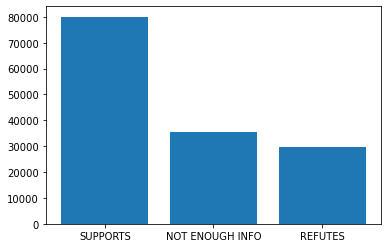

In [6]:
# Data augmentation to add more refuting claims
# Ask Eldridge about sampling data(Use public subset, or sample?)
# If we sample, should we balance classes?
label_counts = df["label"].value_counts()
plt.bar(label_counts.index, label_counts);

In [8]:
open("../data/wiki-pages/wiki-001.jsonl").readlines()[:10]

['{"id": "", "text": "", "lines": ""}\n',
 '{"id": "1928_in_association_football", "text": "The following are the football -LRB- soccer -RRB- events of the year 1928 throughout the world . ", "lines": "0\\tThe following are the football -LRB- soccer -RRB- events of the year 1928 throughout the world .\\n1\\t"}\n',
 '{"id": "1986_NBA_Finals", "text": "The 1986 NBA Finals was the championship round of the 1985 -- 86 NBA season . It pitted the Eastern Conference champion Boston Celtics against the Western Conference champion Houston Rockets , in a rematch of the 1981 Finals -LRB- only Allen Leavell and Robert Reid remained from the Rockets \' 1981 team -RRB- . The Celtics defeated the Rockets four games to two to win their 16th NBA championship . The championship would be the Celtics \' last until the 2008 NBA Finals . Larry Bird was named the Finals MVP .   On another note , this series marked the first time the `` NBA Finals \'\' branding was officially used , as they dropped the `` NBA

In [9]:
df = pd.DataFrame([json.loads(l.strip()) for l in open("../data/paper_dev.jsonl").readlines()])
print("# of claims in training data:", len(df))
df.head()

# of claims in training data: 9999


,id,verifiable,label,claim,evidence
0,91198,NOT VERIFIABLE,NOT ENOUGH INFO,Colin Kaepernick became a starting quarterback...,"[[[108548, None, None, None]]]"
1,194462,NOT VERIFIABLE,NOT ENOUGH INFO,Tilda Swinton is a vegan.,"[[[227768, None, None, None]]]"
2,137334,VERIFIABLE,SUPPORTS,Fox 2000 Pictures released the film Soul Food.,"[[[289914, 283015, Soul_Food_-LRB-film-RRB-, 0..."
3,166626,NOT VERIFIABLE,NOT ENOUGH INFO,Anne Rice was born in New Jersey.,"[[[191656, None, None, None], [191657, None, N..."
4,111897,VERIFIABLE,REFUTES,Telemundo is a English-language television net...,"[[[131371, 146144, Telemundo, 0]], [[131371, 1..."


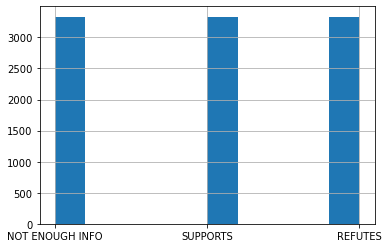

In [10]:
df["label"].hist()